# Нейронные сети Кохонена

https://medium.com/machine-learning-researcher/self-organizing-map-som-c296561e2117

In [ ]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas_profiling
import warnings
warnings.filterwarnings("ignore")
matplotlib.style.use('seaborn-pastel')
from google.colab import drive
drive.mount('/content/drive')
%matplotlib inline

Mounted at /content/drive


NameError: ignored

In [ ]:
df = pd.read_csv(
    "/content/drive/MyDrive/Colab Notebooks/Lesson 0309/winequality-white.csv", delimiter=';'
)

df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


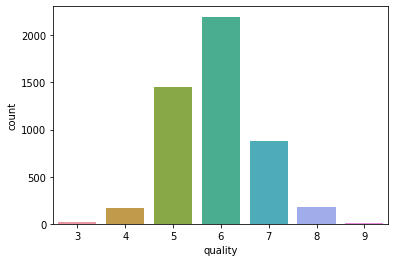

In [ ]:
sns.countplot(x="quality", data=df)

Здесь нам не нужно делить на обучающую и тестовую

In [ ]:
x = df.copy()
y = df['quality']
del x['quality']

Будем использовать готовую реализацию из библиотеки `sklearn-som`:

https://pypi.org/project/sklearn-som/

https://sklearn-som.readthedocs.io/en/latest/

```
pip install sklearn-som
```

In [ ]:
pip install sklearn-som

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from sklearn_som.som import SOM

In [ ]:
x.shape

(4898, 11)

In [ ]:
x.index

RangeIndex(start=0, stop=4898, step=1)

In [ ]:
som = SOM(m=7, n=1, dim=x.shape[1])
som.fit(x.to_numpy())

In [ ]:
predictions = som.predict(x.to_numpy())

In [ ]:
predictions

array([1, 4, 5, ..., 5, 5, 5])

In [ ]:
np.count_nonzero(predictions == y.to_numpy())

425

In [ ]:
min_x = x.to_numpy()[:, :2]

In [ ]:
som = SOM(m=7, n=1, dim=min_x.shape[1])
som.fit(min_x)

In [ ]:
predictions = som.predict(min_x)

In [ ]:
np.count_nonzero(predictions == y.to_numpy())

523

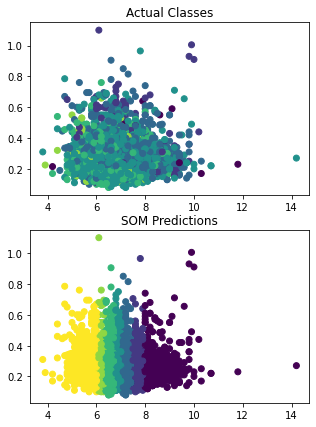

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(5,7))
x_ax = min_x[:, 0]
y_ax = min_x[:, 1]
# colors = ['red', 'green', 'blue', '']
ax[0].scatter(x_ax, y_ax, c=y.to_numpy())
ax[0].title.set_text('Actual Classes')
ax[1].scatter(x_ax, y_ax, c=predictions)
ax[1].title.set_text('SOM Predictions')

In [ ]:
som = SOM(m=20, n=20, dim=min_x.shape[1])
som.fit(min_x)

In [ ]:
predictions = som.predict(min_x)

In [ ]:
np.count_nonzero(predictions == y.to_numpy())

0

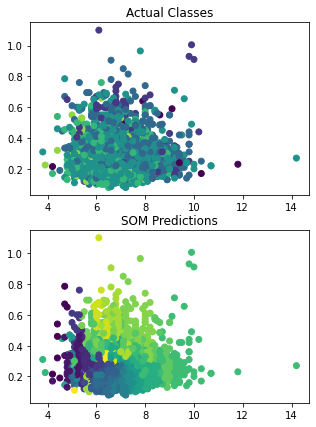

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(5,7))
x_ax = min_x[:, 0]
y_ax = min_x[:, 1]
# colors = ['red', 'green', 'blue', '']
ax[0].scatter(x_ax, y_ax, c=y.to_numpy())
ax[0].title.set_text('Actual Classes')
ax[1].scatter(x_ax, y_ax, c=predictions)
ax[1].title.set_text('SOM Predictions')